In [1]:
import numpy as np, pandas as pd
from yaml import safe_load
import yaml
import os
from tqdm import tqdm

In [2]:
filenames=[]
for file in os.listdir('../Dataset/t20s/'):
    filenames.append(os.path.join('../Dataset/t20s',file))

In [3]:
filenames[0:5]

['../Dataset/t20s\\1001349.yaml',
 '../Dataset/t20s\\1001351.yaml',
 '../Dataset/t20s\\1001353.yaml',
 '../Dataset/t20s\\1004729.yaml',
 '../Dataset/t20s\\1007655.yaml']

In [4]:
final_df=pd.DataFrame()
counter = 1
for file in tqdm(filenames):
    try:
        with open(file,'r') as f:
            df = pd.json_normalize(safe_load(f))
            df['match_id']=counter
            final_df = final_df.append(df)
    except UnicodeDecodeError:
        print(f"Error processing {file}. Skipping.")
    counter+=1        

  0%|          | 0/1433 [00:00<?, ?it/s]

C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\453669982.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df)
  0%|          | 1/1433 [00:00<21:58,  1.09it/s]C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\453669982.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df)
  0%|          | 2/1433 [00:01<20:23,  1.17it/s]C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\453669982.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df)
  0%|          | 3/1433 [00:02<18:35,  1.28it/s]C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\453669982.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

NotImplementedError: 

In [5]:
final_df1 = final_df
final_df1

innings  meta.data_version  \
0   [{'1st innings': {'team': 'Australia', 'delive...                0.9   
0   [{'1st innings': {'team': 'Australia', 'delive...                0.9   
0   [{'1st innings': {'team': 'Australia', 'delive...                0.9   
0   [{'1st innings': {'team': 'Hong Kong', 'delive...                0.9   
0   [{'1st innings': {'team': 'Zimbabwe', 'deliver...                0.9   
..                                                ...                ...   
0   [{'1st innings': {'team': 'Sri Lanka', 'delive...                0.9   
0   [{'1st innings': {'team': 'Bangladesh', 'deliv...                0.9   
0   [{'1st innings': {'team': 'Netherlands', 'deli...                0.9   
0   [{'1st innings': {'team': 'Australia', 'delive...                0.9   
0   [{'1st innings': {'team': 'Sri Lanka', 'delive...                0.9   

   meta.created  meta.revision    info.dates info.gender info.match_type  \
0    2017-02-18              2  [2017-02-17]        male             T20   
0    2017-02-19              2  [2017-02-19]        male             T20   
0    2017-02-23              1  [2017-02-22]        male             T20   
0    2016-09-12              1  [2016-09-05]        male             T20   
0    2016-06-19              1  [2016-06-18]        male             T20   
..          ...            ...           ...         ...             ...   
0    2016-03-05              2  [2016-03-04]        male             T20   
0    2016-03-08              1  [2016-03-06]        male             T20   
0    2016-02-03              1  [2016-02-03]        male             T20   
0    2016-09-12              1  [2016-09-06]        male             T20   
0    2016-09-12              1  [2016-09-09]        male             T20   

    info.outcome.by.wickets info.outcome.winner  info.overs  ...  \
0                       5.0           Sri Lanka          20  ...   
0                       2.0           Sri Lanka          20  ...   
0                       NaN           Australia          20  ...   
0                       NaN           Hong Kong          20  ...   
0                       NaN            Zimbabwe          20  ...   
..                      ...                 ...         ...  ...   
0                       6.0            Pakistan          20  ...   
0                       8.0               India          20  ...   
0                       NaN         Netherlands          20  ...   
0                       NaN           Australia          20  ...   
0                       4.0           Australia          20  ...   

   info.outcome.by.runs info.match_type_number info.neutral_venue  \
0                   NaN                    NaN                NaN   
0                   NaN                    NaN                NaN   
0                  41.0                    NaN                NaN   
0                  40.0                    NaN                NaN   
0                   2.0                    NaN                NaN   
..                  ...                    ...                ...   
0                   NaN                    NaN                1.0   
0                   NaN                    NaN                NaN   
0                  84.0                    NaN                NaN   
0                  85.0                    NaN                NaN   
0                   NaN                    NaN                NaN   

   info.outcome.method info.outcome.result info.outcome.eliminator  \
0                  NaN                 NaN                     NaN   
0                  NaN                 NaN                     NaN   
0                  NaN                 NaN                     NaN   
0                  NaN                 NaN                     NaN   
0                  NaN                 NaN                     NaN   
..                 ...                 ...                     ...   
0                  NaN                 NaN                     NaN   
0             

In [6]:
final_df1.drop (columns=[
'meta.data_version',
'meta.created',
'meta.revision',
'info.outcome.bowl_out',
'info.bowl_out',
'info.supersubs.South Africa',
'info.supersubs.New Zealand',
'info.outcome.eliminator',
'info.outcome.result',
'info.outcome.method',
'info.neutral_venue',
'info.match_type_number',
'info.outcome.by.runs',
'info.outcome.by.wickets'],inplace=True)

In [7]:
final_df1['info.gender'].value_counts()

male      966
female    466
Name: info.gender, dtype: int64

In [8]:
final_df1=final_df1[final_df1['info.gender']=='male']
final_df1.drop(columns=['info.gender'],inplace=True)
final_df1

C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\3077796806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df1.drop(columns=['info.gender'],inplace=True)


innings    info.dates  \
0   [{'1st innings': {'team': 'Australia', 'delive...  [2017-02-17]   
0   [{'1st innings': {'team': 'Australia', 'delive...  [2017-02-19]   
0   [{'1st innings': {'team': 'Australia', 'delive...  [2017-02-22]   
0   [{'1st innings': {'team': 'Hong Kong', 'delive...  [2016-09-05]   
0   [{'1st innings': {'team': 'Zimbabwe', 'deliver...  [2016-06-18]   
..                                                ...           ...   
0   [{'1st innings': {'team': 'Sri Lanka', 'delive...  [2016-03-04]   
0   [{'1st innings': {'team': 'Bangladesh', 'deliv...  [2016-03-06]   
0   [{'1st innings': {'team': 'Netherlands', 'deli...  [2016-02-03]   
0   [{'1st innings': {'team': 'Australia', 'delive...  [2016-09-06]   
0   [{'1st innings': {'team': 'Sri Lanka', 'delive...  [2016-09-09]   

   info.match_type info.outcome.winner  info.overs info.player_of_match  \
0              T20           Sri Lanka          20      [DAS Gunaratne]   
0              T20           Sri Lanka          20      [DAS Gunaratne]   
0              T20           Australia          20            [A Zampa]   
0              T20           Hong Kong          20                  NaN   
0              T20            Zimbabwe          20       [E Chigumbura]   
..             ...                 ...         ...                  ...   
0              T20            Pakistan          20         [Umar Akmal]   
0              T20               India          20           [S Dhawan]   
0              T20         Netherlands          20   [Mudassar Bukhari]   
0              T20           Australia          20         [GJ Maxwell]   
0              T20           Australia          20         [GJ Maxwell]   

                             info.teams info.toss.decision  \
0                [Australia, Sri Lanka]              field   
0                [Australia, Sri Lanka]              field   
0                [Australia, Sri Lanka]              field   
0                  [Ireland, Hong Kong]                bat   
0                     [Zimbabwe, India]              field   
..                                  ...                ...   
0                 [Pakistan, Sri Lanka]              field   
0                   [Bangladesh, India]              field   
0   [United Arab Emirates, Netherlands]              field   
0                [Sri Lanka, Australia]              field   
0                [Sri Lanka, Australia]                bat   

        info.toss.winner                        info.umpires  \
0              Sri Lanka              [MD Martell, P Wilson]   
0              Sri Lanka               [SD Fry, SJ Nogajski]   
0              Sri Lanka              [MD Martell, P Wilson]   
0              Hong Kong                 [R Black, AJ Neill]   
0                  India            [TJ Matibiri, RB Tiffin]   
..                   ...                                 ...   
0               Pakistan        [AK Chaudhary, Enamul Haque]   
0                  India    [RSA Palliyaguruge, Shozab Raza]   
0   United Arab Emirates          [CK Nandan, Sarika Prasad]   
0              Sri Lanka      [REJ Martinesz, RR Wimalasiri]   
0              Sri Lanka  [REJ Martinesz, RSA Palliyaguruge]   

                                 info.venue  match_id    info.city  
0                  Melbourne Cricket Ground         1          NaN  
0            Simonds Stadium, South Geelong         2     Victoria  
0                             Adelaide Oval         3          NaN  
0         Bready Cricket Club, Magheramason         4  Londonderry  
0                        Harare Sports Club         5          NaN  
..                                      ...       ...          ...  
0             Shere Bangla National Stadium      1428       Mirpur  
0             Shere Bangla National Stadium      1429       Mirpur  
0                               ICC Academy      1430        Dubai  
0   Pallekele International Cricket Stadium      1431          NaN  
0                  

In [9]:
final_df1['info.match_type'].value_counts()

T20    966
Name: info.match_type, dtype: int64

In [10]:
final_df1['info.overs'].value_counts()

20    963
50      3
Name: info.overs, dtype: int64

In [11]:
final_df1=final_df1[final_df1['info.overs']==20]
final_df1.drop(columns=['info.overs','info.match_type'],inplace=True)
final_df1

C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\1005022360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df1.drop(columns=['info.overs','info.match_type'],inplace=True)


innings    info.dates  \
0   [{'1st innings': {'team': 'Australia', 'delive...  [2017-02-17]   
0   [{'1st innings': {'team': 'Australia', 'delive...  [2017-02-19]   
0   [{'1st innings': {'team': 'Australia', 'delive...  [2017-02-22]   
0   [{'1st innings': {'team': 'Hong Kong', 'delive...  [2016-09-05]   
0   [{'1st innings': {'team': 'Zimbabwe', 'deliver...  [2016-06-18]   
..                                                ...           ...   
0   [{'1st innings': {'team': 'Sri Lanka', 'delive...  [2016-03-04]   
0   [{'1st innings': {'team': 'Bangladesh', 'deliv...  [2016-03-06]   
0   [{'1st innings': {'team': 'Netherlands', 'deli...  [2016-02-03]   
0   [{'1st innings': {'team': 'Australia', 'delive...  [2016-09-06]   
0   [{'1st innings': {'team': 'Sri Lanka', 'delive...  [2016-09-09]   

   info.outcome.winner info.player_of_match  \
0            Sri Lanka      [DAS Gunaratne]   
0            Sri Lanka      [DAS Gunaratne]   
0            Australia            [A Zampa]   
0            Hong Kong                  NaN   
0             Zimbabwe       [E Chigumbura]   
..                 ...                  ...   
0             Pakistan         [Umar Akmal]   
0                India           [S Dhawan]   
0          Netherlands   [Mudassar Bukhari]   
0            Australia         [GJ Maxwell]   
0            Australia         [GJ Maxwell]   

                             info.teams info.toss.decision  \
0                [Australia, Sri Lanka]              field   
0                [Australia, Sri Lanka]              field   
0                [Australia, Sri Lanka]              field   
0                  [Ireland, Hong Kong]                bat   
0                     [Zimbabwe, India]              field   
..                                  ...                ...   
0                 [Pakistan, Sri Lanka]              field   
0                   [Bangladesh, India]              field   
0   [United Arab Emirates, Netherlands]              field   
0                [Sri Lanka, Australia]              field   
0                [Sri Lanka, Australia]                bat   

        info.toss.winner                        info.umpires  \
0              Sri Lanka              [MD Martell, P Wilson]   
0              Sri Lanka               [SD Fry, SJ Nogajski]   
0              Sri Lanka              [MD Martell, P Wilson]   
0              Hong Kong                 [R Black, AJ Neill]   
0                  India            [TJ Matibiri, RB Tiffin]   
..                   ...                                 ...   
0               Pakistan        [AK Chaudhary, Enamul Haque]   
0                  India    [RSA Palliyaguruge, Shozab Raza]   
0   United Arab Emirates          [CK Nandan, Sarika Prasad]   
0              Sri Lanka      [REJ Martinesz, RR Wimalasiri]   
0              Sri Lanka  [REJ Martinesz, RSA Palliyaguruge]   

                                 info.venue  match_id    info.city  
0                  Melbourne Cricket Ground         1          NaN  
0            Simonds Stadium, South Geelong         2     Victoria  
0                             Adelaide Oval         3          NaN  
0         Bready Cricket Club, Magheramason         4  Londonderry  
0                        Harare Sports Club         5          NaN  
..                                      ...       ...          ...  
0             Shere Bangla National Stadium      1428       Mirpur  
0             Shere Bangla National Stadium      1429       Mirpur  
0                               ICC Academy      1430        Dubai  
0   Pallekele International Cricket Stadium      1431          NaN  
0                       R Premadasa Stadium      1432      Colombo  

[963 rows x 11 columns]

In [12]:
import pickle
pickle.dump(final_df1,open('dataset_level1.pkl','wb'))

In [13]:
matches = pickle.load(open('dataset_level1.pkl','rb'))
matches.iloc[0]['innings'][0]['1st innings']['deliveries']

[{0.1: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.2: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.3: {'batsman': 'AJ Finch',
   'bowler': 'SL Malinga',
   'non_striker': 'M Klinger',
   'runs': {'batsman': 1, 'extras': 0, 'total': 1}}},
 {0.4: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 2, 'extras': 0, 'total': 2}}},
 {0.5: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.6: {'batsman': 'M Klinger',
   'bowler': 'SL Malinga',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 3, 'extras': 0, 'total': 3}}},
 {1.1: {'batsman': 'M Klinger',
   'bowler': 'KMDN Kulasekara',
   'non_striker': 'AJ Finch',
   'runs': {'batsman': 0, 'extras': 0, 'total': 

In [14]:
count = 1
delivery_df = pd.DataFrame()
for index,row in matches.iterrows():
    if count in [75, 108, 150, 180, 268, 360, 443,458, 584, 748,982, 1052,1111, 1226, 1345]:
        count+=1 
        continue
    count+=1
    ball_of_match = []
    batsman = []
    bowler =[]
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    match_id = []
    city = []
    venue =[]
    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball. keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            batsman.append(ball[key] ['batsman']) 
            bowler.append(ball[key] ['bowler'])
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key] ['wicket']['player_out'])
            except:
                player_of_dismissed.append ('0')
    loop_df = pd.DataFrame({
        'match_id':match_id,
        'teams':teams,
        'batting_team':batting_team,
        'ball':ball_of_match,
        'batsman':batsman,
        'bowler':'bowler',
        'runs':runs,
        'player_dismissed':player_of_dismissed,
        'city':city,
        'venue':venue
        })
    delivery_df = delivery_df.append(loop_df)

C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\1273133401.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\1273133401.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\1273133401.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\1273133401.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  delivery_df = delivery_df.append(loop_df)
C:\Users\kushal\

In [15]:
delivery_df

match_id                   teams batting_team  ball          batsman  \
0           2  [Australia, Sri Lanka]    Australia   0.1         AJ Finch   
1           2  [Australia, Sri Lanka]    Australia   0.2         AJ Finch   
2           2  [Australia, Sri Lanka]    Australia   0.3         AJ Finch   
3           2  [Australia, Sri Lanka]    Australia   0.4        M Klinger   
4           2  [Australia, Sri Lanka]    Australia   0.5        M Klinger   
..        ...                     ...          ...   ...              ...   
121       964  [Sri Lanka, Australia]    Sri Lanka  19.3  SMSM Senanayake   
122       964  [Sri Lanka, Australia]    Sri Lanka  19.4      DM de Silva   
123       964  [Sri Lanka, Australia]    Sri Lanka  19.5      DM de Silva   
124       964  [Sri Lanka, Australia]    Sri Lanka  19.6  SMSM Senanayake   
125       964  [Sri Lanka, Australia]    Sri Lanka  19.7  SMSM Senanayake   

     bowler  runs player_dismissed     city                     venue  
0    bowler     0                0      NaN  Melbourne Cricket Ground  
1    bowler     0                0      NaN  Melbourne Cricket Ground  
2    bowler     1                0      NaN  Melbourne Cricket Ground  
3    bowler     2                0      NaN  Melbourne Cricket Ground  
4    bowler     0                0      NaN  Melbourne Cricket Ground  
..      ...   ...              ...      ...                       ...  
121  bowler     1                0  Colombo       R Premadasa Stadium  
122  bowler     0                0  Colombo       R Premadasa Stadium  
123  bowler     0      DM de Silva  Colombo       R Premadasa Stadium  
124  bowler     2                0  Colombo       R Premadasa Stadium  
125  bowler     1                0  Colombo       R Premadasa Stadium  

[115325 rows x 10 columns]

In [16]:
def bowl(row):
    for team in row['teams']:
        if team != row['batting_team']:
            return team

In [17]:
delivery_df['bowling_team']= delivery_df.apply(bowl,axis=1)

In [18]:
delivery_df

match_id                   teams batting_team  ball          batsman  \
0           2  [Australia, Sri Lanka]    Australia   0.1         AJ Finch   
1           2  [Australia, Sri Lanka]    Australia   0.2         AJ Finch   
2           2  [Australia, Sri Lanka]    Australia   0.3         AJ Finch   
3           2  [Australia, Sri Lanka]    Australia   0.4        M Klinger   
4           2  [Australia, Sri Lanka]    Australia   0.5        M Klinger   
..        ...                     ...          ...   ...              ...   
121       964  [Sri Lanka, Australia]    Sri Lanka  19.3  SMSM Senanayake   
122       964  [Sri Lanka, Australia]    Sri Lanka  19.4      DM de Silva   
123       964  [Sri Lanka, Australia]    Sri Lanka  19.5      DM de Silva   
124       964  [Sri Lanka, Australia]    Sri Lanka  19.6  SMSM Senanayake   
125       964  [Sri Lanka, Australia]    Sri Lanka  19.7  SMSM Senanayake   

     bowler  runs player_dismissed     city                     venue  \
0    bowler     0                0      NaN  Melbourne Cricket Ground   
1    bowler     0                0      NaN  Melbourne Cricket Ground   
2    bowler     1                0      NaN  Melbourne Cricket Ground   
3    bowler     2                0      NaN  Melbourne Cricket Ground   
4    bowler     0                0      NaN  Melbourne Cricket Ground   
..      ...   ...              ...      ...                       ...   
121  bowler     1                0  Colombo       R Premadasa Stadium   
122  bowler     0                0  Colombo       R Premadasa Stadium   
123  bowler     0      DM de Silva  Colombo       R Premadasa Stadium   
124  bowler     2                0  Colombo       R Premadasa Stadium   
125  bowler     1                0  Colombo       R Premadasa Stadium   

    bowling_team  
0      Sri Lanka  
1      Sri Lanka  
2      Sri Lanka  
3      Sri Lanka  
4      Sri Lanka  
..           ...  
121    Australia  
122    Australia  
123    Australia  
124    Australia  
125    Australia  

[115325 rows x 11 columns]

In [19]:
delivery_df['batting_team'].value_counts()

Pakistan                    10100
South Africa                 8434
India                        8257
New Zealand                  8232
Sri Lanka                    7937
West Indies                  7243
Australia                    6861
England                      6845
Afghanistan                  5206
Bangladesh                   4881
Ireland                      4539
Zimbabwe                     4361
Netherlands                  4011
United Arab Emirates         3069
Hong Kong                    2220
Scotland                     2214
Kenya                        1819
Oman                         1743
Malaysia                     1618
Nepal                        1588
Singapore                    1360
Papua New Guinea             1239
Canada                       1231
Namibia                       989
Jersey                        983
Thailand                      751
Nigeria                       739
Bermuda                       703
Cayman Islands                619
Vanuatu       

In [20]:
teams =[
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'South Africa',
    'England',
    'West Indies',
    'Afghanistan',
    'Pakistan',
    'Sri Lanka'
]

In [21]:
delivery_df=delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df=delivery_df[delivery_df['bowling_team'].isin(teams)]


In [22]:
delivery_df.drop(columns=['teams'],inplace=True)


In [23]:
output = delivery_df[['match_id','batting_team','bowling_team','ball','runs','player_dismissed','city','venue']]
output

match_id batting_team bowling_team  ball  runs player_dismissed     city  \
0           2    Australia    Sri Lanka   0.1     0                0      NaN   
1           2    Australia    Sri Lanka   0.2     0                0      NaN   
2           2    Australia    Sri Lanka   0.3     1                0      NaN   
3           2    Australia    Sri Lanka   0.4     2                0      NaN   
4           2    Australia    Sri Lanka   0.5     0                0      NaN   
..        ...          ...          ...   ...   ...              ...      ...   
121       964    Sri Lanka    Australia  19.3     1                0  Colombo   
122       964    Sri Lanka    Australia  19.4     0                0  Colombo   
123       964    Sri Lanka    Australia  19.5     0      DM de Silva  Colombo   
124       964    Sri Lanka    Australia  19.6     2                0  Colombo   
125       964    Sri Lanka    Australia  19.7     1                0  Colombo   

                        venue  
0    Melbourne Cricket Ground  
1    Melbourne Cricket Ground  
2    Melbourne Cricket Ground  
3    Melbourne Cricket Ground  
4    Melbourne Cricket Ground  
..                        ...  
121       R Premadasa Stadium  
122       R Premadasa Stadium  
123       R Premadasa Stadium  
124       R Premadasa Stadium  
125       R Premadasa Stadium  

[63888 rows x 8 columns]

In [24]:
pickle.dump(output,open('dataset_level2.pkl','wb'))

In [25]:
df=pickle.load(open('dataset_level2.pkl','rb'))

In [26]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [27]:
df[df['city'].isnull()]['venue'].value_counts()

Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

In [28]:
cities = np.where(df['city'].isnull(), df['venue'].str.split().apply(lambda x:x[0]), df['city'])

In [29]:
df['city'] = cities

In [30]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [31]:
df['city'].value_counts()

Colombo          4086
Mirpur           3420
Johannesburg     3331
Dubai            2969
Auckland         2532
                 ... 
Nairobi           123
Potchefstroom     122
Dharamsala        122
Ahmedabad         121
Carrara            64
Name: city, Length: 86, dtype: int64

In [32]:
df.drop(columns=['venue'],inplace=True)

In [33]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts()>600].index.tolist()
df=df[df['city'].isin(eligible_cities)]
df

match_id batting_team bowling_team  ball  runs player_dismissed  \
0           2    Australia    Sri Lanka   0.1     0                0   
1           2    Australia    Sri Lanka   0.2     0                0   
2           2    Australia    Sri Lanka   0.3     1                0   
3           2    Australia    Sri Lanka   0.4     2                0   
4           2    Australia    Sri Lanka   0.5     0                0   
..        ...          ...          ...   ...   ...              ...   
121       964    Sri Lanka    Australia  19.3     1                0   
122       964    Sri Lanka    Australia  19.4     0                0   
123       964    Sri Lanka    Australia  19.5     0      DM de Silva   
124       964    Sri Lanka    Australia  19.6     2                0   
125       964    Sri Lanka    Australia  19.7     1                0   

          city  
0    Melbourne  
1    Melbourne  
2    Melbourne  
3    Melbourne  
4    Melbourne  
..         ...  
121    Colombo  
122    Colombo  
123    Colombo  
124    Colombo  
125    Colombo  

[50501 rows x 7 columns]

In [34]:
df['current_score']= df.groupby('match_id').cumsum()['runs']
df

C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\1248953603.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df['current_score']= df.groupby('match_id').cumsum()['runs']


match_id batting_team bowling_team  ball  runs player_dismissed  \
0           2    Australia    Sri Lanka   0.1     0                0   
1           2    Australia    Sri Lanka   0.2     0                0   
2           2    Australia    Sri Lanka   0.3     1                0   
3           2    Australia    Sri Lanka   0.4     2                0   
4           2    Australia    Sri Lanka   0.5     0                0   
..        ...          ...          ...   ...   ...              ...   
121       964    Sri Lanka    Australia  19.3     1                0   
122       964    Sri Lanka    Australia  19.4     0                0   
123       964    Sri Lanka    Australia  19.5     0      DM de Silva   
124       964    Sri Lanka    Australia  19.6     2                0   
125       964    Sri Lanka    Australia  19.7     1                0   

          city  current_score  
0    Melbourne              0  
1    Melbourne              0  
2    Melbourne              1  
3    Melbourne              3  
4    Melbourne              3  
..         ...            ...  
121    Colombo            125  
122    Colombo            125  
123    Colombo            125  
124    Colombo            127  
125    Colombo            128  

[50501 rows x 8 columns]

In [35]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


In [36]:
df['balls_bowled']=(df['over'].astype('int')*6) + df['ball_no'].astype('int')

In [37]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df

match_id batting_team bowling_team  ball  runs player_dismissed  \
0           2    Australia    Sri Lanka   0.1     0                0   
1           2    Australia    Sri Lanka   0.2     0                0   
2           2    Australia    Sri Lanka   0.3     1                0   
3           2    Australia    Sri Lanka   0.4     2                0   
4           2    Australia    Sri Lanka   0.5     0                0   
..        ...          ...          ...   ...   ...              ...   
121       964    Sri Lanka    Australia  19.3     1                0   
122       964    Sri Lanka    Australia  19.4     0                0   
123       964    Sri Lanka    Australia  19.5     0      DM de Silva   
124       964    Sri Lanka    Australia  19.6     2                0   
125       964    Sri Lanka    Australia  19.7     1                0   

          city  current_score over ball_no  balls_bowled  balls_left  
0    Melbourne              0    0       1             1         119  
1    Melbourne              0    0       2             2         118  
2    Melbourne              1    0       3             3         117  
3    Melbourne              3    0       4             4         116  
4    Melbourne              3    0       5             5         115  
..         ...            ...  ...     ...           ...         ...  
121    Colombo            125   19       3           117           3  
122    Colombo            125   19       4           118           2  
123    Colombo            125   19       5           119           1  
124    Colombo            127   19       6           120           0  
125    Colombo            128   19       7           121           0  

[50501 rows x 12 columns]

In [38]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:1 if x!= '0' else 0)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
df['wickets_left'] = 10 - df['player_dismissed']

C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\3458074267.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']


In [39]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']
df.head()

match_id batting_team bowling_team  ball  runs  player_dismissed  \
0         2    Australia    Sri Lanka   0.1     0                 0   
1         2    Australia    Sri Lanka   0.2     0                 0   
2         2    Australia    Sri Lanka   0.3     1                 0   
3         2    Australia    Sri Lanka   0.4     2                 0   
4         2    Australia    Sri Lanka   0.5     0                 0   

        city  current_score over ball_no  balls_bowled  balls_left  \
0  Melbourne              0    0       1             1         119   
1  Melbourne              0    0       2             2         118   
2  Melbourne              1    0       3             3         117   
3  Melbourne              3    0       4             4         116   
4  Melbourne              3    0       5             5         115   

   wickets_left  crr  
0            10  0.0  
1            10  0.0  
2            10  2.0  
3            10  4.5  
4            10  3.6

In [40]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five =[]
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\2038149298.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['batting_team', 'bowling_team', 'city'], dtype='object')
  last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())


In [41]:
df['last_five'] = last_five
df.sample(5)

match_id batting_team bowling_team  ball  runs  player_dismissed  \
71         57  West Indies     Pakistan  11.5     6                 3   
102       751    Sri Lanka     Pakistan  16.3     4                 4   
24        670  West Indies    Sri Lanka   3.6     0                 1   
95        232        India   Bangladesh  15.5     1                 4   
56        692  West Indies  New Zealand   9.2     1                 1   

           city  current_score over ball_no  balls_bowled  balls_left  \
71     Trinidad             67   11       5            71          49   
102       Dubai            104   16       3            99          21   
24      Colombo              8    3       6            24          96   
95        Delhi            102   15       5            95          25   
56   Lauderhill             73    9       2            56          64   

     wickets_left       crr  last_five  
71              7  5.661972       17.0  
102             6  6.303030       34.0  
24              9  2.000000        NaN  
95              6  6.442105       29.0  
56              9  7.821429       40.0

In [42]:
final_df1 = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

C:\Users\kushal\AppData\Local\Temp\ipykernel_25124\239567706.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df1 = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')


In [43]:
final_df1.head()

match_id  runs_x batting_team bowling_team  ball  runs_y  player_dismissed  \
0         2     168    Australia    Sri Lanka   0.1       0                 0   
1         2     168    Australia    Sri Lanka   0.2       0                 0   
2         2     168    Australia    Sri Lanka   0.3       1                 0   
3         2     168    Australia    Sri Lanka   0.4       2                 0   
4         2     168    Australia    Sri Lanka   0.5       0                 0   

        city  current_score over ball_no  balls_bowled  balls_left  \
0  Melbourne              0    0       1             1         119   
1  Melbourne              0    0       2             2         118   
2  Melbourne              1    0       3             3         117   
3  Melbourne              3    0       4             4         116   
4  Melbourne              3    0       5             5         115   

   wickets_left  crr  last_five  
0            10  0.0        NaN  
1            10  0.0        NaN  
2            10  2.0        NaN  
3            10  4.5        NaN  
4            10  3.6        NaN

In [44]:
final_df1 = final_df1[['batting_team', 'bowling_team', 'city', 'current_score', 'balls_left',
'wickets_left', 'crr', 'last_five', 'runs_x']]

In [45]:
final_df1.isnull().sum()

batting_team         0
bowling_team         0
city                 0
current_score        0
balls_left           0
wickets_left         0
crr                  0
last_five        12024
runs_x               0
dtype: int64

In [46]:
final_df1.dropna(inplace=True)

In [47]:
final_df1 = final_df1.sample(final_df1.shape[0])

In [48]:
final_df1

batting_team  bowling_team             city  current_score  balls_left  \
13220    Australia         India           Sydney             59          78   
8020   New Zealand         India         Auckland             76          57   
25368    Australia     Sri Lanka         Barbados             38          82   
4457         India       England          Cardiff             89          35   
3383   West Indies   Afghanistan         St Kitts             48          92   
...            ...           ...              ...            ...         ...   
5063         India  South Africa     Johannesburg            149          36   
29872    Australia         India        Melbourne            121          12   
31455  New Zealand    Bangladesh        Pallekele            126          26   
25389    Australia     Sri Lanka         Barbados             63          61   
368    New Zealand    Bangladesh  Mount Maunganui            190           5   

       wickets_left        crr  last_five  runs_x  
13220             9   8.428571       44.0     186  
8020              6   7.238095       34.0     158  
25368             6   6.000000       31.0     168  
4457              6   6.282353       41.0     148  
3383              9  10.285714       48.0     112  
...             ...        ...        ...     ...  
5063              7  10.642857       43.0     203  
29872             4   6.722222       29.0     131  
31455             8   8.042553       48.0     191  
25389             6   6.406780       33.0     168  
368               4   9.913043       40.0     195  

[38477 rows x 9 columns]

In [49]:
# Encoding 

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder 
  

  
# Converting type of columns to category 
final_df1['batting_team'] = final_df1['batting_team'].astype('category') 
final_df1['bowling_team'] = final_df1['bowling_team'].astype('category') 
final_df1['city'] = final_df1['city'].astype('category') 
  
# Assigning numerical values and storing it in another columns 
final_df1['batting_team'] = final_df1['batting_team'].cat.codes 
final_df1['bowling_team'] = final_df1['bowling_team'].cat.codes
final_df1['city'] = final_df1['city'].cat.codes
  
  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform( 
    final_df1[['batting_team', 'bowling_team','city']]).toarray()) 
  
# Merge with main 
New_df = final_df1.join(enc_data) 

final_df2= pd.DataFrame(New_df)
final_df2 = final_df2[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]
final_df2

batting_team  bowling_team  city  current_score  balls_left  \
13220             1             4    32             59          78   
8020              5             4     2             76          57   
25368             1             8     4             38          82   
4457              4             3     6             89          35   
3383              9             0    30             48          92   
...             ...           ...   ...            ...         ...   
5063              4             7    16            149          36   
29872             1             4    22            121          12   
31455             5             2    28            126          26   
25389             1             8     4             63          61   
368               5             2    24            190           5   

       wickets_left        crr  last_five  runs_x  
13220             9   8.428571       44.0     186  
8020              6   7.238095       34.0     158  
25368             6   6.000000       31.0     168  
4457              6   6.282353       41.0     148  
3383              9  10.285714       48.0     112  
...             ...        ...        ...     ...  
5063              7  10.642857       43.0     203  
29872             4   6.722222       29.0     131  
31455             8   8.042553       48.0     191  
25389             6   6.406780       33.0     168  
368               4   9.913043       40.0     195  

[38477 rows x 9 columns]

In [50]:
corr=final_df2.corr()
corr

batting_team  bowling_team      city  current_score  \
batting_team       1.000000     -0.189235 -0.068883      -0.027700   
bowling_team      -0.189235      1.000000 -0.042163       0.016216   
city              -0.068883     -0.042163  1.000000      -0.013839   
current_score     -0.027700      0.016216 -0.013839       1.000000   
balls_left         0.001168     -0.000057 -0.000041      -0.862662   
wickets_left       0.032108     -0.014840  0.022954      -0.385264   
crr               -0.053396      0.037614 -0.036085       0.541206   
last_five         -0.037681      0.006786 -0.000669       0.528279   
runs_x            -0.035409      0.005057 -0.014552       0.426976   

               balls_left  wickets_left       crr  last_five    runs_x  
batting_team     0.001168      0.032108 -0.053396  -0.037681 -0.035409  
bowling_team    -0.000057     -0.014840  0.037614   0.006786  0.005057  
city            -0.000041      0.022954 -0.036085  -0.000669 -0.014552  
current_score   -0.862662     -0.385264  0.541206   0.528279  0.426976  
balls_left       1.000000      0.666707 -0.083889  -0.194463 -0.035072  
wickets_left     0.666707      1.000000  0.302932   0.236179  0.387297  
crr             -0.083889      0.302932  1.000000   0.768312  0.757212  
last_five       -0.194463      0.236179  0.768312   1.000000  0.614438  
runs_x          -0.035072      0.387297  0.757212   0.614438  1.000000

<AxesSubplot: >

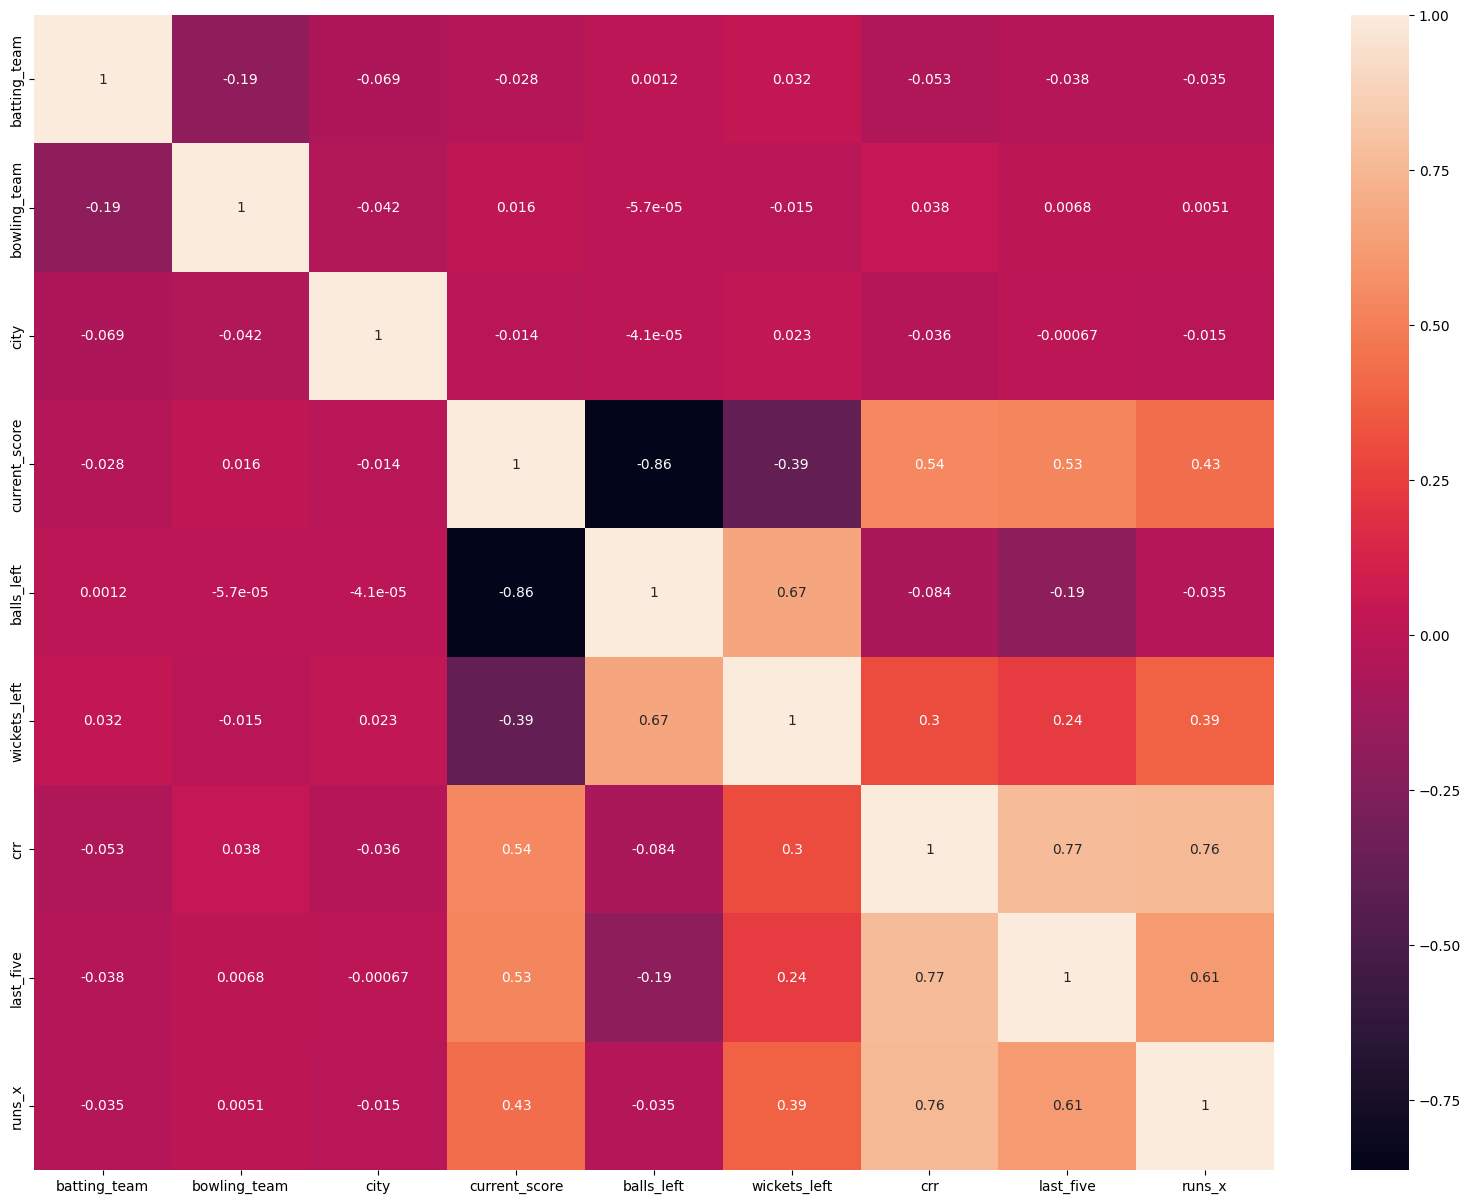

In [51]:
import matplotlib.pyplot as plt, seaborn as sns
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

<AxesSubplot: >

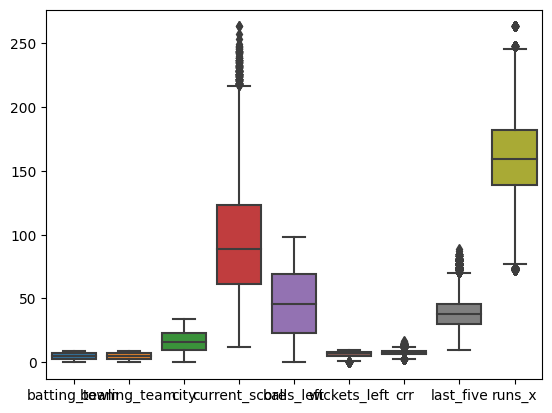

In [52]:
# Outlier Detection
sns.boxplot(data=final_df2)


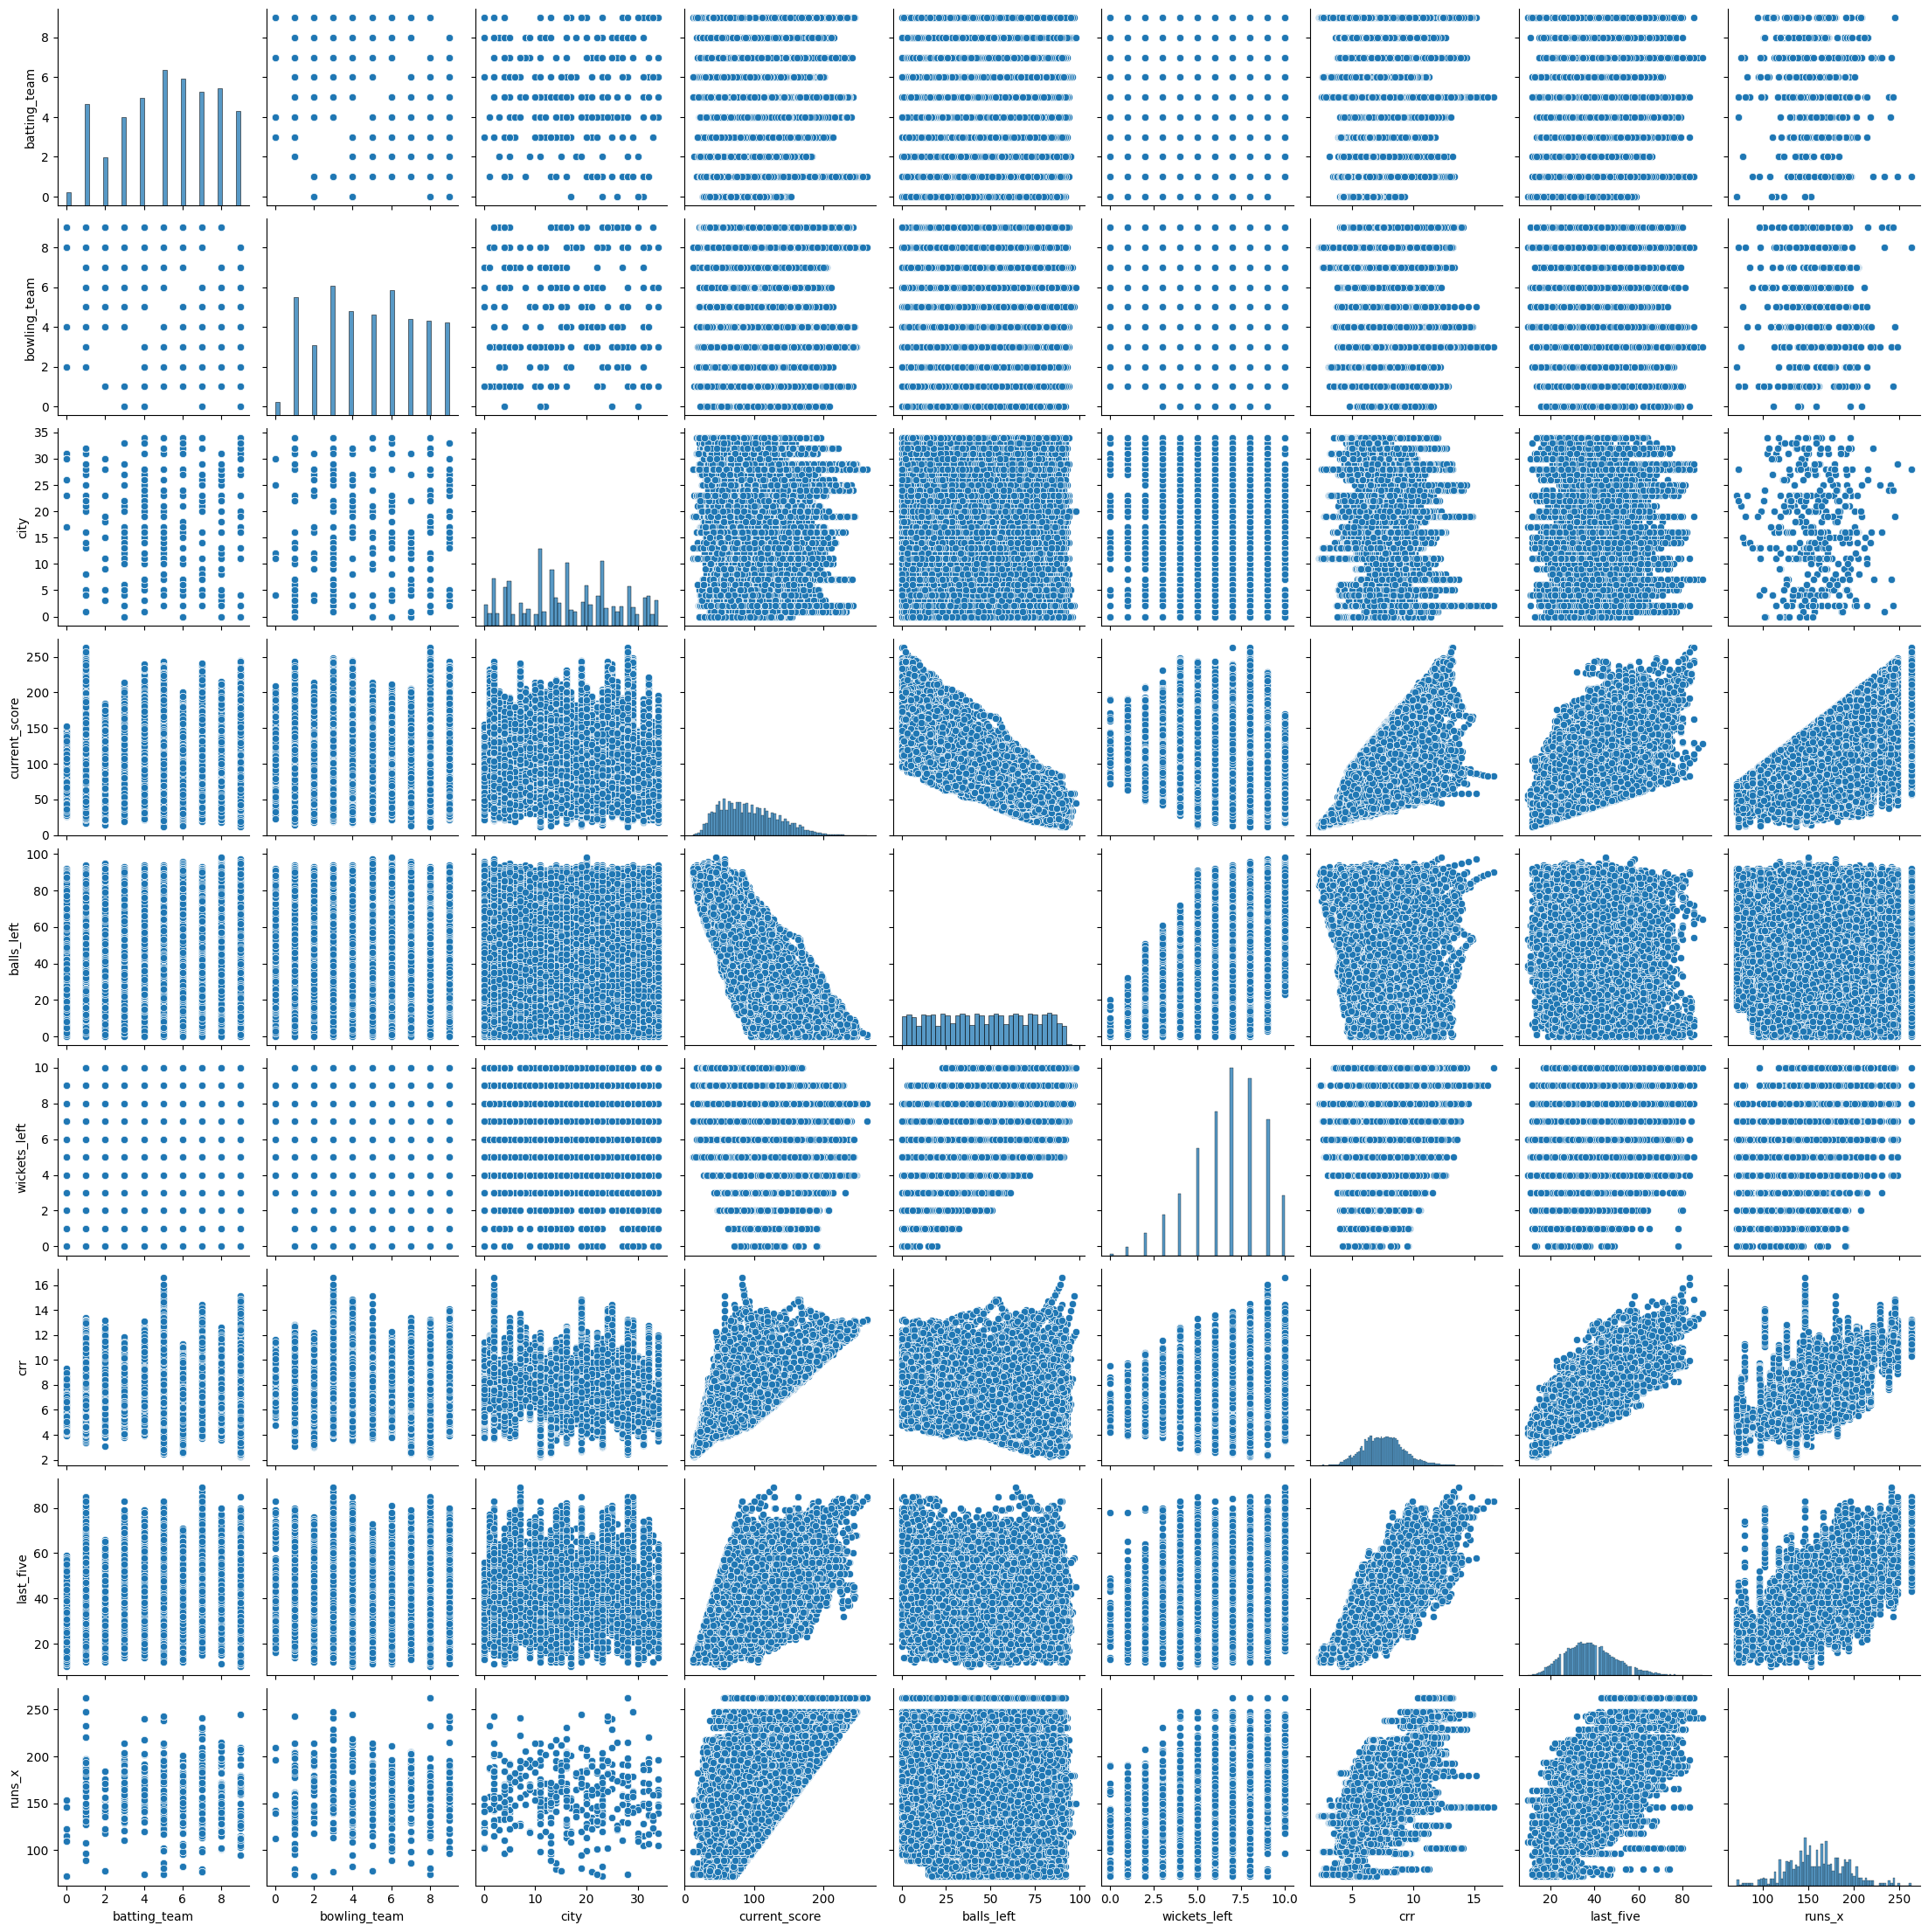

In [53]:
import seaborn as sns
sns.pairplot(final_df2)

In [54]:
X = final_df2.drop(columns=['runs_x'])
y = final_df2['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [55]:
X_train

batting_team  bowling_team  city  current_score  balls_left  \
20070             3             6    20             80          74   
25622             5             3    31             47          74   
20217             1             8    27             75          52   
1198              9             4    19            189          36   
42386             5             6    13             44          76   
...             ...           ...   ...            ...         ...   
46649             7             8     5             48          84   
7628              2             9    19             48          76   
21593             7             4    27             98          33   
45968             6             5    15             35          80   
8022              5             4     2             79          55   

       wickets_left        crr  last_five  
20070             8  10.434783       62.0  
25622             9   6.130435       28.0  
20217             6   6.617647       24.0  
1198              9  13.500000       64.0  
42386             7   6.000000       29.0  
...             ...        ...        ...  
46649             9   8.000000       38.0  
7628              8   6.545455       35.0  
21593             8   6.758621       36.0  
45968             8   5.250000       21.0  
8022              6   7.292308       36.0  

[30781 rows x 8 columns]

In [ ]:
prediction_nor=preprocessing.normalize()

##### Normalized Data

In [56]:
from sklearn import tree, metrics, model_selection, preprocessing
nor_final_data = preprocessing.normalize(final_df2)
y1 = nor_final_data[:,-1]
X1 = nor_final_data[:,1:-1]

In [57]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=1)

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [59]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

#### Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
linear_regressor_pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',LinearRegression())
])

In [61]:
linear_regressor_pipe.fit(X_train,y_train)
y_pred = linear_regressor_pipe.predict(X_test)


##### Evaluation Metrics

In [62]:
# R_2 Score
print(r2_score(y_test,y_pred))

0.694496371034274


In [63]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

316.9787514257199

In [64]:
# Root mean Squared Error
import math
difference = np.subtract(y_test, y_pred)
sqre_err = np.square(difference)
rslt_meansqre_err = sqre_err.mean()
math.sqrt(rslt_meansqre_err)

17.803897085349597

In [65]:
# Normalized Root Mean Squared Error
import numpy as np

def nrmse(predictions, targets):
    predictions = np.array(predictions)
    targets = np.array(targets)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((predictions - targets) ** 2))

    # Calculate range of data
    data_range = np.max(targets) - np.min(targets)

    # Calculate NRMSE
    nrmse = rmse / data_range

    return nrmse

nrmse(y_pred,y_test)

0.0932141208657047

In [66]:
# MAPE
import numpy as np

def mape(predictions, targets):
    predictions = np.array(predictions)
    targets = np.array(targets)

    # Calculate absolute percentage error
    absolute_percentage_error = np.abs((targets - predictions) / targets)

    # Calculate mean of absolute percentage error
    mape = np.mean(absolute_percentage_error) * 100

    return mape

mape(y_pred,y_test)

8.74594694197367

In [67]:
# MAD
import numpy as np

def mad(predictions, targets):
    predictions = np.array(predictions)
    targets = np.array(targets)

    # Calculate absolute deviations
    absolute_deviations = np.abs(targets - predictions)

    # Calculate mean of absolute deviations
    mad = np.mean(absolute_deviations)

    return mad

mad(y_pred,y_test)

13.12624284011405

#### XGBRegressor

In [68]:
import pandas  as pd
import numpy   as np
import xgboost as xgb
xgBoost=xgb.XGBRegressor(eval_metric='rmsle')
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth":    [12],
              "random_state": [1],
              "n_estimators": [1000],
              "learning_rate": [0.2]}
search = GridSearchCV(xgBoost, param_grid, cv=5).fit(X_train1, y_train)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 1000, 'random_state': 1}


In [69]:
xgBoosterr=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           random_state = search.best_params_["random_state"],
                           eval_metric='rmsle')

xgBoosterr.fit(X_train1, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [70]:
y_pred_xgb = xgBoosterr.predict(X_test1)

In [71]:
# R_2 Score
print(r2_score(y_test,y_pred_xgb))

0.9980582020184721


#### Random Forest Regressor

In [72]:
import pandas  as pd
import numpy   as np
regressor=RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth":    [9],
              "verbose": [1],
              "random_state": [1],
              "n_estimators": [500],
              "criterion":['poisson'],
              "min_samples_split":[2],
              "min_samples_leaf":[25],
              "n_jobs":[1],
              "oob_score":[True],
              "max_features":[0.7]}
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train1, y_train)
print("The best hyperparameters are ",search.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

The best hyperparameters are  {'criterion': 'poisson', 'max_depth': 9, 'max_features': 0.7, 'min_samples_leaf': 25, 'min_samples_split': 2, 'n_estimators': 500, 'n_jobs': 1, 'oob_score': True, 'random_state': 1, 'verbose': 1}


In [73]:
regressor_rf=RandomForestRegressor(n_estimators  = search.best_params_["n_estimators"],
                                max_depth = search.best_params_["max_depth"],
                                random_state = search.best_params_["random_state"],
                                verbose = search.best_params_["verbose"],
                                n_jobs= search.best_params_["n_jobs"],
                                oob_score= search.best_params_["oob_score"],
                                min_samples_split=search.best_params_["min_samples_split"],
                                max_features=search.best_params_["max_features"],
                                criterion=search.best_params_["criterion"],
                                )

regressor_rf.fit(X_train1, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.4min finished


RandomForestRegressor(criterion='poisson', max_depth=9, max_features=0.7,
                      n_estimators=500, n_jobs=1, oob_score=True,
                      random_state=1, verbose=1)

In [74]:
y_pred_rf = regressor_rf.predict(X_test1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished


In [75]:
r2_score(y_test,y_pred_rf)

0.9762787941922031

#### CatBoost Regressor


In [76]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor()

In [98]:
param_grid_3 = {"logging_level": ['Silent'],
              "random_state": [123,1234,45],
              "early_stopping_rounds": [200,300,400]}


search = GridSearchCV(cbr, param_grid_3, cv=5).fit(X_train1, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'early_stopping_rounds': 200, 'logging_level': 'Silent', 'random_state': 123}


In [99]:
cbr=CatBoostRegressor(logging_level= search.best_params_["logging_level"],
                           random_state=   search.best_params_["random_state"],
                           early_stopping_rounds=     search.best_params_["early_stopping_rounds"])
cbr.fit(X_train1,y_train)

In [79]:
y_pred_cbr = cbr.predict(X_test1)
r2_score(y_test1,y_pred_cbr)


0.9991419225324553

In [80]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_cbr)

2.742822847846718e-06

In [81]:
# Root mean Squared Error
import math
difference = np.subtract(y_test, y_pred_cbr)
sqre_err = np.square(difference)
rslt_meansqre_err = sqre_err.mean()
math.sqrt(rslt_meansqre_err)

0.0016561469885993567

In [82]:
# MAD
import numpy as np

def mad(predictions, targets):
    predictions = np.array(predictions)
    targets = np.array(targets)

    # Calculate absolute deviations
    absolute_deviations = np.abs(targets - predictions)

    # Calculate mean of absolute deviations
    mad = np.mean(absolute_deviations)

    return mad

mad(y_pred_cbr,y_test)

0.0010172587764687938

In [83]:
dtr = tree.DecisionTreeRegressor(criterion='squared_error',max_depth= 5)
dtr.fit(X_train1,y_train)

DecisionTreeRegressor(max_depth=5)

In [84]:
fig = plt.figure(figsize=(200,200))
_ = tree.plot_tree(dtr, feature_names=final_df2.columns, filled=True)

In [85]:
y_pred_dtr=dtr.predict(X_test1)
r2_score(y_test,y_pred_dtr)

0.8702966521648369

#### Gradient Boosting Regressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas  as pd
import numpy   as np
import xgboost as xgb
regressor=GradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth":    [3],
              "subsample": [1],
              "verbose": [0],
              "random_state": [10],
              "n_estimators": [500],
              "learning_rate": [0.1]}
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train1, y_train)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'random_state': 10, 'subsample': 1, 'verbose': 0}


In [87]:
regressor_grb=GradientBoostingRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           subsample= search.best_params_["subsample"],
                           verbose=search.best_params_["verbose"],
                           random_state=search.best_params_["random_state"],
                           loss="absolute_error"
                           )

regressor_grb.fit(X_train1, y_train)

GradientBoostingRegressor(loss='absolute_error', n_estimators=500,
                          random_state=10, subsample=1)

In [88]:
y_pred_gbr = regressor_grb.predict(X_test1)
r2_score(y_test,y_pred_gbr)

0.9976765474014156

#### XGBRF Regressor

In [89]:
import pandas  as pd
import numpy   as np
import xgboost as xg
regressor=xg.XGBRFRegressor()
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth":    [9],
              "subsample": [1],
              "reg_alpha": [0],
              "gamma": [0],
              "verbosity": [0],
              "random_state": [3],
              "n_estimators": [600],
              "num_parallel_tree" : [200],
              "eta" : [0.5],
              "learning_rate": [0.99]}
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train1, y_train)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'eta': 0.5, 'gamma': 0, 'learning_rate': 0.99, 'max_depth': 9, 'n_estimators': 600, 'num_parallel_tree': 200, 'random_state': 3, 'reg_alpha': 0, 'subsample': 1, 'verbosity': 0}


In [90]:
regressor_xgr=xgb.XGBRFRegressor(n_estimators  = search.best_params_["n_estimators"],
                                max_depth = search.best_params_["max_depth"],
                                random_state = search.best_params_["random_state"],
                                verbosity = search.best_params_["verbosity"],
                                num_parallel_tree = search.best_params_["num_parallel_tree"],
                                subsample = search.best_params_["subsample"],
                                gamma = search.best_params_["gamma"],
                                learning_rate = search.best_params_["learning_rate"],
                                eta = search.best_params_["eta"],
                                reg_alpha = search.best_params_["reg_alpha"]                              )

regressor_xgr.fit(X_train1, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False, eta=0.5,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.99, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=9, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=600, n_jobs=None, num_parallel_tree=200,
               objective='reg:squarederror', predictor=None, ...)

In [91]:
y_pred_xgr = regressor_xgr.predict(X_test1)
r2_score(y_test,y_pred_xgr)

0.9770596458292848

In [92]:
pickle.dump(cbr,open('../model/cbr.pkl','wb'))

In [93]:
pickle.dump(xgBoosterr,open('../model/xgboost.pkl','wb'))